In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(6804.9561)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 760.52813  validloss 2236.71072±0.00000  bestvalidloss 2236.71072  last_update 0
train: iter 1  trainloss 559.96670  validloss 878.05037±0.00000  bestvalidloss 878.05037  last_update 0
train: iter 2  trainloss 262.63987  validloss 879.73117±0.00000  bestvalidloss 878.05037  last_update 1
train: iter 3  trainloss 86.78176  validloss 480.16124±0.00000  bestvalidloss 480.16124  last_update 0
train: iter 4  trainloss -86.67241  validloss 330.27684±0.00000  bestvalidloss 330.27684  last_update 0
train: iter 5  trainloss -262.76072  validloss 225.61911±0.00000  bestvalidloss 225.61911  last_update 0
train: iter 6  trainloss -289.50345  validloss 184.50145±0.00000  bestvalidloss 184.50145  last_update 0
train: iter 7  trainloss -515.07055  validloss 47.40218±0.00000  bestvalidloss 47.40218  last_update 0
train: iter 8  trainloss -572.59722  validloss -266.65000±0.00000  bestvalidloss -266.65000  last_update 0
train: iter 9  trainloss -639.20318  val

train: iter 76  trainloss -1522.47808  validloss -1264.64537±0.00000  bestvalidloss -1264.64537  last_update 0
train: iter 77  trainloss -1593.83716  validloss -1252.85492±0.00000  bestvalidloss -1264.64537  last_update 1
train: iter 78  trainloss -1560.87371  validloss -1220.18467±0.00000  bestvalidloss -1264.64537  last_update 2
train: iter 79  trainloss -1544.15555  validloss -975.24637±0.00000  bestvalidloss -1264.64537  last_update 3
train: iter 80  trainloss -1555.40826  validloss -1257.92256±0.00000  bestvalidloss -1264.64537  last_update 4
train: iter 81  trainloss -1560.14051  validloss -1263.25710±0.00000  bestvalidloss -1264.64537  last_update 5
train: iter 82  trainloss -1527.79554  validloss -1061.48992±0.00000  bestvalidloss -1264.64537  last_update 6
train: iter 83  trainloss -1647.97301  validloss -1340.60886±0.00000  bestvalidloss -1340.60886  last_update 0
train: iter 84  trainloss -1627.21367  validloss -1294.42043±0.00000  bestvalidloss -1340.60886  last_update 1
tr

train: iter 150  trainloss -1806.76513  validloss -1486.54864±0.00000  bestvalidloss -1618.74923  last_update 8
train: iter 151  trainloss -1820.49084  validloss -1615.78284±0.00000  bestvalidloss -1618.74923  last_update 9
train: iter 152  trainloss -1703.39506  validloss -1306.98220±0.00000  bestvalidloss -1618.74923  last_update 10
train: iter 153  trainloss -1797.29507  validloss -1589.15685±0.00000  bestvalidloss -1618.74923  last_update 11
train: iter 154  trainloss -1814.57725  validloss -1669.84924±0.00000  bestvalidloss -1669.84924  last_update 0
train: iter 155  trainloss -1795.59461  validloss -1616.36617±0.00000  bestvalidloss -1669.84924  last_update 1
train: iter 156  trainloss -1829.10943  validloss -1622.85171±0.00000  bestvalidloss -1669.84924  last_update 2
train: iter 157  trainloss -1794.62045  validloss -1632.11739±0.00000  bestvalidloss -1669.84924  last_update 3
train: iter 158  trainloss -1837.49129  validloss -1610.64608±0.00000  bestvalidloss -1669.84924  last

train: iter 223  trainloss -1828.01815  validloss -1420.63505±0.00000  bestvalidloss -1715.14945  last_update 18
train: iter 224  trainloss -1919.61681  validloss -1697.40613±0.00000  bestvalidloss -1715.14945  last_update 19
train: iter 225  trainloss -1900.66525  validloss -1687.30064±0.00000  bestvalidloss -1715.14945  last_update 20
train: iter 226  trainloss -1832.33486  validloss -1653.80221±0.00000  bestvalidloss -1715.14945  last_update 21
train: iter 227  trainloss -1846.61973  validloss -1680.52902±0.00000  bestvalidloss -1715.14945  last_update 22
train: iter 228  trainloss -1846.20353  validloss -1586.88590±0.00000  bestvalidloss -1715.14945  last_update 23
train: iter 229  trainloss -1844.38855  validloss -988.50041±0.00000  bestvalidloss -1715.14945  last_update 24
train: iter 230  trainloss -1900.55891  validloss -1636.02100±0.00000  bestvalidloss -1715.14945  last_update 25
train: iter 231  trainloss -1867.48995  validloss -1715.65711±0.00000  bestvalidloss -1715.65711 

train: iter 297  trainloss -1904.04055  validloss -1581.69881±0.00000  bestvalidloss -1764.16567  last_update 10
train: iter 298  trainloss -1896.58233  validloss -1707.80071±0.00000  bestvalidloss -1764.16567  last_update 11
train: iter 299  trainloss -1909.55534  validloss -1745.53712±0.00000  bestvalidloss -1764.16567  last_update 12
train: iter 300  trainloss -1904.34339  validloss -1685.07990±0.00000  bestvalidloss -1764.16567  last_update 13
train: iter 301  trainloss -1910.81311  validloss -1673.55713±0.00000  bestvalidloss -1764.16567  last_update 14
train: iter 302  trainloss -1848.08221  validloss -1723.06705±0.00000  bestvalidloss -1764.16567  last_update 15
train: iter 303  trainloss -1833.90711  validloss -1441.67338±0.00000  bestvalidloss -1764.16567  last_update 16
train: iter 304  trainloss -1934.47201  validloss -1728.48884±0.00000  bestvalidloss -1764.16567  last_update 17
train: iter 305  trainloss -1891.01606  validloss -1721.84212±0.00000  bestvalidloss -1764.16567

train: iter 370  trainloss -1771.17478  validloss -1256.44005±0.00000  bestvalidloss -1789.40511  last_update 10
train: iter 371  trainloss -1944.22219  validloss -1680.77708±0.00000  bestvalidloss -1789.40511  last_update 11
train: iter 372  trainloss -1945.86456  validloss -1714.25426±0.00000  bestvalidloss -1789.40511  last_update 12
train: iter 373  trainloss -1952.59914  validloss -1753.97501±0.00000  bestvalidloss -1789.40511  last_update 13
train: iter 374  trainloss -1907.20504  validloss -1627.47796±0.00000  bestvalidloss -1789.40511  last_update 14
train: iter 375  trainloss -1934.61058  validloss -1709.57462±0.00000  bestvalidloss -1789.40511  last_update 15
train: iter 376  trainloss -1830.30039  validloss -1671.47789±0.00000  bestvalidloss -1789.40511  last_update 16
train: iter 377  trainloss -1938.28621  validloss -1706.34622±0.00000  bestvalidloss -1789.40511  last_update 17
train: iter 378  trainloss -1910.17603  validloss -1614.41051±0.00000  bestvalidloss -1789.40511

train: iter 443  trainloss -1942.20327  validloss -1720.21609±0.00000  bestvalidloss -1789.40511  last_update 83
train: iter 444  trainloss -1904.21444  validloss -1736.28821±0.00000  bestvalidloss -1789.40511  last_update 84
train: iter 445  trainloss -1953.86121  validloss -1691.95770±0.00000  bestvalidloss -1789.40511  last_update 85
train: iter 446  trainloss -1904.53993  validloss -1651.16192±0.00000  bestvalidloss -1789.40511  last_update 86
train: iter 447  trainloss -1894.53816  validloss -1665.27889±0.00000  bestvalidloss -1789.40511  last_update 87
train: iter 448  trainloss -1959.03612  validloss -1741.29286±0.00000  bestvalidloss -1789.40511  last_update 88
train: iter 449  trainloss -1967.17360  validloss -1748.43324±0.00000  bestvalidloss -1789.40511  last_update 89
train: iter 450  trainloss -1798.23607  validloss -1424.00986±0.00000  bestvalidloss -1789.40511  last_update 90
train: iter 451  trainloss -1951.41938  validloss -1719.62004±0.00000  bestvalidloss -1789.40511

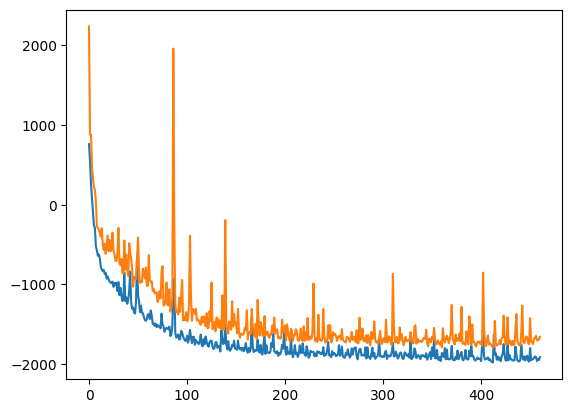

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 8.34623  validloss 8.60471±0.00000  bestvalidloss 8.60471  last_update 0
train: iter 1  trainloss 7.61238  validloss 7.79045±0.00000  bestvalidloss 7.79045  last_update 0
train: iter 2  trainloss 7.00391  validloss 7.12602±0.00000  bestvalidloss 7.12602  last_update 0
train: iter 3  trainloss 6.49376  validloss 6.61252±0.00000  bestvalidloss 6.61252  last_update 0
train: iter 4  trainloss 6.08510  validloss 6.16922±0.00000  bestvalidloss 6.16922  last_update 0
train: iter 5  trainloss 5.72749  validloss 5.79342±0.00000  bestvalidloss 5.79342  last_update 0
train: iter 6  trainloss 5.42215  validloss 5.45898±0.00000  bestvalidloss 5.45898  last_update 0
train: iter 7  trainloss 5.16584  validloss 5.20702±0.00000  bestvalidloss 5.20702  last_update 0
train: iter 8  trainloss 4.93122  validloss 4.97379±0.00000  bestvalidloss 4.97379  last_update 0
train: iter 9  trainloss 4.73927  validloss 4.75356±0.00000  bestvalidloss 4.75356  last_update 0
train: iter 10  trai

train: iter 95  trainloss -1.74233  validloss -0.94833±0.00000  bestvalidloss -1.06505  last_update 4
train: iter 96  trainloss -1.80809  validloss -0.99181±0.00000  bestvalidloss -1.06505  last_update 5
train: iter 97  trainloss -1.83656  validloss -0.85894±0.00000  bestvalidloss -1.06505  last_update 6
train: iter 98  trainloss -1.83362  validloss -0.81474±0.00000  bestvalidloss -1.06505  last_update 7
train: iter 99  trainloss -1.88300  validloss -1.05763±0.00000  bestvalidloss -1.06505  last_update 8
train: iter 100  trainloss -1.89407  validloss -0.94402±0.00000  bestvalidloss -1.06505  last_update 9
train: iter 101  trainloss -1.89441  validloss -0.95303±0.00000  bestvalidloss -1.06505  last_update 10
train: iter 102  trainloss -1.97168  validloss -0.96053±0.00000  bestvalidloss -1.06505  last_update 11
train: iter 103  trainloss -1.99629  validloss -1.09621±0.00000  bestvalidloss -1.09621  last_update 0
train: iter 104  trainloss -2.02748  validloss -0.89144±0.00000  bestvalidlo

train: iter 178  trainloss -2.35298  validloss -0.14196±0.00000  bestvalidloss -1.14306  last_update 60
train: iter 179  trainloss -2.34057  validloss -0.00714±0.00000  bestvalidloss -1.14306  last_update 61
train: iter 180  trainloss -2.33995  validloss 0.13118±0.00000  bestvalidloss -1.14306  last_update 62
train: iter 181  trainloss -2.31709  validloss -0.37240±0.00000  bestvalidloss -1.14306  last_update 63
train: iter 182  trainloss -2.28859  validloss -0.16563±0.00000  bestvalidloss -1.14306  last_update 64
train: iter 183  trainloss -2.26493  validloss 0.26851±0.00000  bestvalidloss -1.14306  last_update 65
train: iter 184  trainloss -2.33088  validloss 0.02361±0.00000  bestvalidloss -1.14306  last_update 66
train: iter 185  trainloss -2.27819  validloss -0.22919±0.00000  bestvalidloss -1.14306  last_update 67
train: iter 186  trainloss -2.34686  validloss -0.39746±0.00000  bestvalidloss -1.14306  last_update 68
train: iter 187  trainloss -2.34117  validloss -0.18089±0.00000  be

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.0616, -2.1096, -5.4833, -4.8519], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 86.19999  validloss 85.10554±0.00000  bestvalidloss 85.10554  last_update 0
train: iter 1  trainloss 64.99169  validloss 65.77870±0.00000  bestvalidloss 65.77870  last_update 0
train: iter 2  trainloss 50.96455  validloss 50.00049±0.00000  bestvalidloss 50.00049  last_update 0
train: iter 3  trainloss 40.79596  validloss 40.12970±0.00000  bestvalidloss 40.12970  last_update 0
train: iter 4  trainloss 32.23129  validloss 32.27347±0.00000  bestvalidloss 32.27347  last_update 0
train: iter 5  trainloss 25.71460  validloss 25.95654±0.00000  bestvalidloss 25.95654  last_update 0
train: iter 6  trainloss 20.65241  validloss 21.51435±0.00000  bestvalidloss 21.51435  last_update 0
train: iter 7  trainloss 16.69480  validloss 18.22109±0.00000  bestvalidloss 18.22109  last_update 0
train: iter 8  trainloss 13.56745  validloss 15.44901±0.00000  bestvalidloss 15.44901  last_update 0
train: iter 9  trainloss 11.12570  validloss 13.47407±0.00000  bestvalidloss 13.47407  last

train: iter 83  trainloss 2.13771  validloss 6.41777±0.00000  bestvalidloss 6.05786  last_update 18
train: iter 84  trainloss 2.13787  validloss 6.44125±0.00000  bestvalidloss 6.05786  last_update 19
train: iter 85  trainloss 2.13847  validloss 6.70002±0.00000  bestvalidloss 6.05786  last_update 20
train: iter 86  trainloss 2.18300  validloss 6.30698±0.00000  bestvalidloss 6.05786  last_update 21
train: iter 87  trainloss 2.18752  validloss 6.62139±0.00000  bestvalidloss 6.05786  last_update 22
train: iter 88  trainloss 2.16344  validloss 6.42258±0.00000  bestvalidloss 6.05786  last_update 23
train: iter 89  trainloss 2.13028  validloss 6.04633±0.00000  bestvalidloss 6.04633  last_update 0
train: iter 90  trainloss 2.15240  validloss 6.84309±0.00000  bestvalidloss 6.04633  last_update 1
train: iter 91  trainloss 2.13718  validloss 6.17621±0.00000  bestvalidloss 6.04633  last_update 2
train: iter 92  trainloss 2.14022  validloss 6.63693±0.00000  bestvalidloss 6.04633  last_update 3
trai

train: iter 167  trainloss 2.09458  validloss 6.37934±0.00000  bestvalidloss 6.01788  last_update 72
train: iter 168  trainloss 2.15281  validloss 6.42083±0.00000  bestvalidloss 6.01788  last_update 73
train: iter 169  trainloss 2.12347  validloss 6.22042±0.00000  bestvalidloss 6.01788  last_update 74
train: iter 170  trainloss 2.09483  validloss 6.45367±0.00000  bestvalidloss 6.01788  last_update 75
train: iter 171  trainloss 2.12019  validloss 6.38641±0.00000  bestvalidloss 6.01788  last_update 76
train: iter 172  trainloss 2.14336  validloss 6.35804±0.00000  bestvalidloss 6.01788  last_update 77
train: iter 173  trainloss 2.11788  validloss 6.61911±0.00000  bestvalidloss 6.01788  last_update 78
train: iter 174  trainloss 2.11319  validloss 6.87274±0.00000  bestvalidloss 6.01788  last_update 79
train: iter 175  trainloss 2.10928  validloss 6.50930±0.00000  bestvalidloss 6.01788  last_update 80
train: iter 176  trainloss 2.14941  validloss 6.74828±0.00000  bestvalidloss 6.01788  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-15.5064)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.7583)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.7358152213658345
tensor([-0.2217])
